Image center is located at (y=92, x=92)
RGB value at the center: [172  92  67]


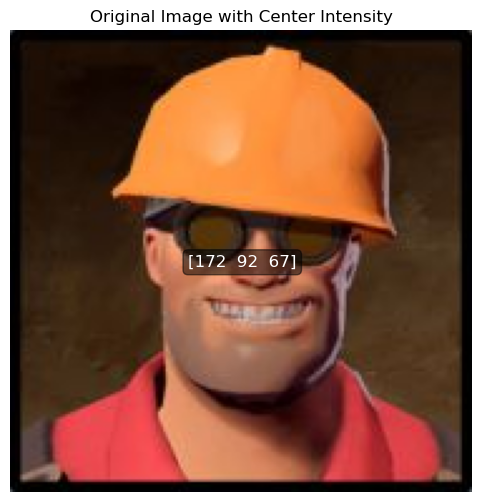

RGB value at the center after adding the patch: [ 50 158 168]


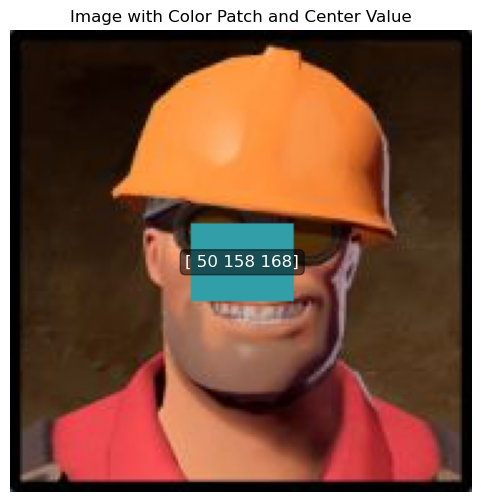

In [22]:
# Problem-1: Working with tf2_engineer.jpg
# 2. Find the centre of the image (𝑦𝑦𝑐𝑐, 𝑥𝑥𝑐𝑐) and print the intensity value at the centre.
# 3. Place a rectangular colour patch around the centre of the image. Height of the patch is 30 pixels;
# width of the patch is 40 pixels. Patch Colour (in Hex): #329ea8
# 4. Print the intensity value at the centre of the colour patch.
# 5. Display the new image with colour patch.

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the image using OpenCV (which reads images in BGR format)
img_path = 'data/tf2_engineer.jpg'
img = cv2.imread(img_path)

# the image loaded
if img is None:
    raise FileNotFoundError(f"Could not load image at path: {img_path}")

# Convert image from BGR to RGB for accurate color display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image and find its center
height, width, _ = img.shape
y_center = height // 2
x_center = width // 2

# Get the RGB value at the center of the image
center_rgb_value = img_rgb[y_center, x_center]
print(f"Image center is located at (y={y_center}, x={x_center})")
print(f"RGB value at the center: {center_rgb_value}")

# Display the original image with the center intensity overlaid
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img_rgb)
ax.set_title('Original Image with Center Intensity')
ax.axis('off')
text_color = 'white' if sum(center_rgb_value) < 400 else 'black'
ax.text(x_center, y_center, str(center_rgb_value), color=text_color, fontsize=12, ha='center', va='center', bbox=dict(facecolor='black' if text_color=='white' else 'white', alpha=0.5, boxstyle='round'))
plt.show()

# Prepare the color patch details
hex_color = "#329ea8"
rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
bgr_color = rgb_color[::-1]  # OpenCV uses BGR format

# Define the size of the patch
patch_height = 30
patch_width = 40
half_h = patch_height // 2
half_w = patch_width // 2

# Calculate coordinates for the rectangle
top_left = (x_center - half_w, y_center - half_h)
bottom_right = (x_center + half_w, y_center + half_h)

# Draw the rectangle on a copy of the original image
patched_img = img.copy()
cv2.rectangle(patched_img, top_left, bottom_right, bgr_color, thickness=-1)

# Convert the modified image to RGB for display
patched_img_rgb = cv2.cvtColor(patched_img, cv2.COLOR_BGR2RGB)

# Get the new RGB value at the center
new_center_rgb = patched_img_rgb[y_center, x_center]
print(f"RGB value at the center after adding the patch: {new_center_rgb}")

# Display the patched image with new center intensity shown
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(patched_img_rgb)
ax.set_title('Image with Color Patch and Center Value')
ax.axis('off')
text_color = 'white' if sum(new_center_rgb) < 400 else 'black'
ax.text(x_center, y_center, str(new_center_rgb), color=text_color, fontsize=12, ha='center', va='center', bbox=dict(facecolor='black' if text_color=='white' else 'white', alpha=0.5, boxstyle='round'))
plt.show()


In [44]:
# Problem-2: Negative transformation on einstein.tiff
# 1. Read and display the original image in grayscale.
# 2. Find the negative of the input image.
# 3. Display the negative image.
# 4. From the original image get the intensity value of 5 random pixels, and from the negative image get the intensity value of same pixels. Print pixel values to show pixel values before and after.

import random
# Load the Einstein image in grayscale
einstein_path = 'data/einstein.tif'
einstein_img = cv2.imread(einstein_path, cv2.IMREAD_GRAYSCALE)

# If loading fails, stop the program
if einstein_img is None:
    raise FileNotFoundError(f"Could not load image at path: {einstein_path}")

# Show the grayscale image of Einstein
plt.figure(figsize=(6, 6))
plt.imshow(einstein_img, cmap='gray')
plt.title('Original Grayscale Image - Einstein')
plt.axis('off')
plt.show()

# Create the negative of the image (255 - pixel value)
negative_img = 255 - einstein_img

# Show the negative version
plt.figure(figsize=(6, 6))
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image - Einstein')
plt.axis('off')
plt.show()

# Randomly pick 5 pixels and compare their values in original and negative
h, w = einstein_img.shape
print("\nPixel intensity comparison (Original vs Negative):")
for i in range(5):
    y = random.randint(0, h - 1)
    x = random.randint(0, w - 1)
    original_val = einstein_img[y, x]
    negative_val = negative_img[y, x]
    print(f"Pixel ({y}, {x}) -> Original: {original_val}, Negative: {negative_val}")


SyntaxError: invalid syntax (1536515998.py, line 7)

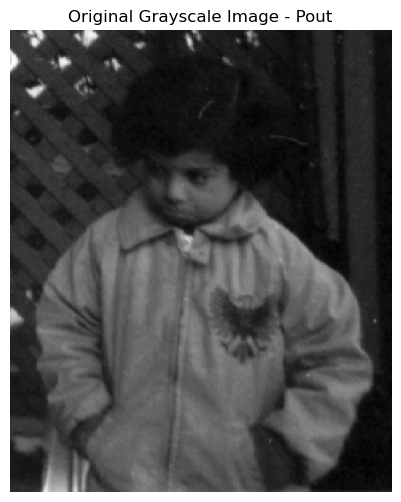

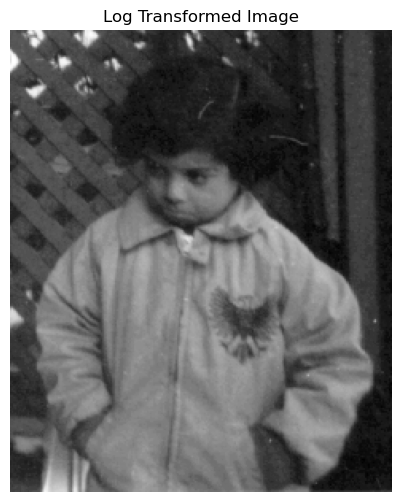

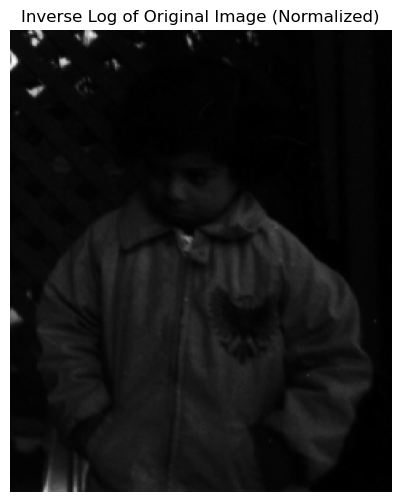

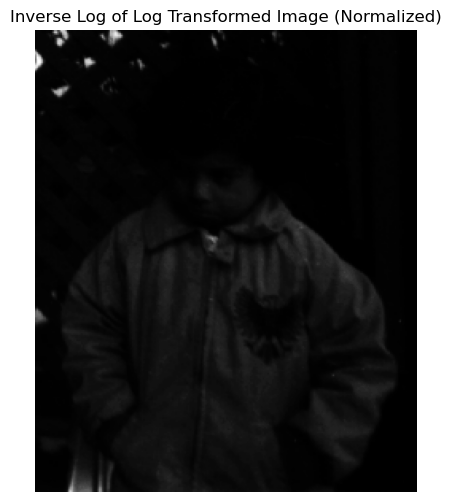


Observation:
- Log transform helps highlight darker regions by spreading out low pixel values.
- Inverse log of the original stretches the values non-linearly in the other direction.
- When we apply inverse log on the log-transformed image, we get something similar to the original, but small differences may appear due to rounding and normalization.


In [32]:
# Problem-3: Log and inverse-log transforms on pout.tiff
import random
# Load the grayscale image of 'pout'
pout_path = 'data/pout.tif'
pout_img = cv2.imread(pout_path, cv2.IMREAD_GRAYSCALE)

# Make sure the image exists
if pout_img is None:
    raise FileNotFoundError(f"Could not load image at path: {pout_path}")

# Step 1: Show the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(pout_img, cmap='gray')
plt.title('Original Grayscale Image - Pout')
plt.axis('off')
plt.show()

# Step 2: Apply logarithmic transformation to enhance darker regions
pout_float = pout_img.astype(np.float32)
log_transformed = np.log1p(pout_float)  # compute log(1 + pixel_value)
log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Show log transformed image
plt.figure(figsize=(6, 6))
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

# Step 3: Inverse log transform directly on normalized original image
# First normalize to 0–1, then apply inverse log (exp - 1)
normalized = pout_float / 255.0
inv_log_original = np.expm1(normalized * np.log(256))
inv_log_original = cv2.normalize(inv_log_original, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Show result of inverse log of original image
plt.figure(figsize=(6, 6))
plt.imshow(inv_log_original, cmap='gray')
plt.title('Inverse Log of Original Image (Normalized)')
plt.axis('off')
plt.show()

# Step 4: Apply inverse log to the already log-transformed image
log_to_inv = log_transformed.astype(np.float32) / 255.0
reconstructed = np.expm1(log_to_inv * np.log(256))
reconstructed = cv2.normalize(reconstructed, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Show the result which attempts to recover the original
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed, cmap='gray')
plt.title('Inverse Log of Log Transformed Image (Normalized)')
plt.axis('off')
plt.show()

# Step 5: Comment and interpret what we see
print("\nObservation:")
print("- Log transform helps highlight darker regions by spreading out low pixel values.")
print("- Inverse log of the original stretches the values non-linearly in the other direction.")
print("- When we apply inverse log on the log-transformed image, we get something similar to the original, but small differences may appear due to rounding and normalization.")


Reading the moon image in grayscale mode...


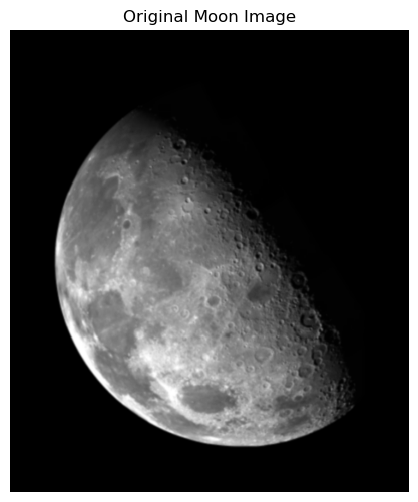

Applying spatial domain unsharp masking with k values: [0.2, 0.5, 1.0]
Applying frequency domain unsharp masking with D0 = 30 and k values: [0.2, 0.5, 1.0]
Displaying results for k = 0.2


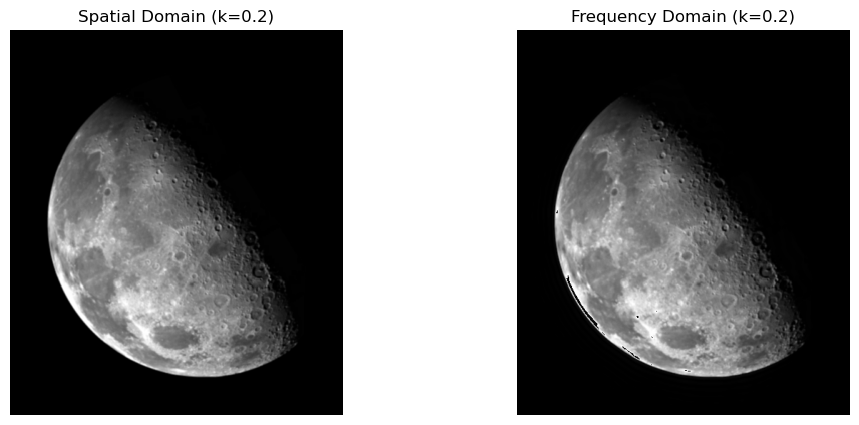

Displaying results for k = 0.5


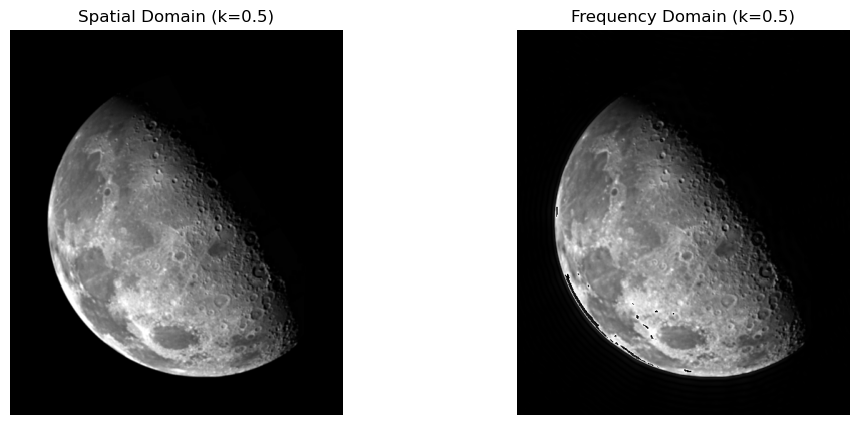

Displaying results for k = 1.0


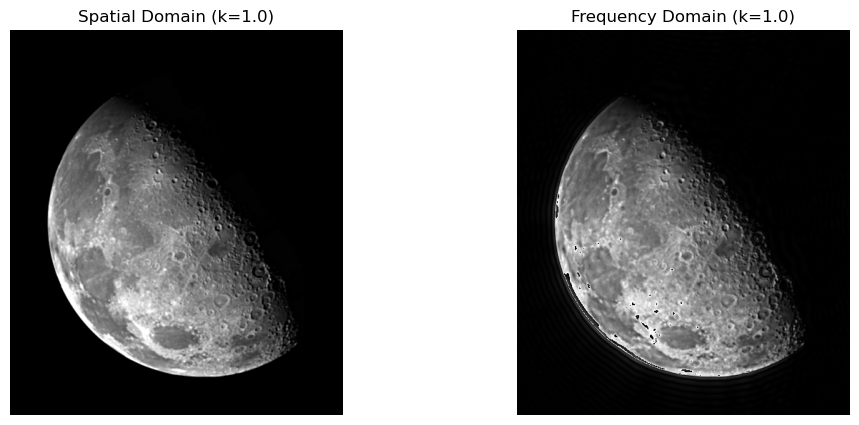


Summary:
- In the spatial domain, sharpening is achieved by subtracting a blurred version from the original image.
- In the frequency domain, a high-pass filter enhances edge components.
- Increasing k results in stronger sharpening.
- Both methods produce similar results, but frequency domain filtering can be more flexible and efficient for certain applications.



In [43]:
# Problem-4: Image Sharpening with Unsharp Masking

"""
In this problem, we apply unsharp masking to the image 'moon.tiff' using two different approaches:
1. Spatial domain unsharp masking using Gaussian blur and a mask.
2. Frequency domain unsharp masking using FFT and a high-pass filter.

We use three different values of the sharpening parameter `k` to observe its effect.
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and display the grayscale image
print("Reading the moon image in grayscale mode...")
img_path = 'data/moon.tif'
moon_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if moon_img is None:
    raise FileNotFoundError(f"Image not found at: {img_path}")

plt.figure(figsize=(6, 6))
plt.imshow(moon_img, cmap='gray')
plt.title('Original Moon Image')
plt.axis('off')
plt.show()

# Step 2: Spatial domain unsharp masking

def unsharp_mask_spatial(image, k):
    image_f = image.astype(np.float32)
    blurred = cv2.GaussianBlur(image_f, (9, 9), 2)
    mask = image_f - blurred
    sharpened = image_f + k * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    return sharpened

k_values = [0.2, 0.5, 1.0]
print("Applying spatial domain unsharp masking with k values:", k_values)
spatial_results = [unsharp_mask_spatial(moon_img, k) for k in k_values]

# Step 3: Frequency domain unsharp masking

def create_highpass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    H = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow)**2 + (v - ccol)**2)
            H[u, v] = 1 if D > D0 else 0
    return H

def unsharp_mask_frequency(image, k, D0):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    H = create_highpass_filter(image.shape, D0)
    sharpened = np.fft.ifft2(np.fft.ifftshift((1 + k * H) * dft_shift))
    return np.abs(sharpened).astype(np.uint8)

print("Applying frequency domain unsharp masking with D0 = 30 and k values:", k_values)
frequency_results = [unsharp_mask_frequency(moon_img, k, D0=30) for k in k_values]

# Step 4: Compare the results for each k
for i, k in enumerate(k_values):
    print(f"Displaying results for k = {k}")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(spatial_results[i], cmap='gray')
    plt.title(f'Spatial Domain (k={k})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(frequency_results[i], cmap='gray')
    plt.title(f'Frequency Domain (k={k})')
    plt.axis('off')

    plt.show()

# Final Comment:
print("""
Summary:
- In the spatial domain, sharpening is achieved by subtracting a blurred version from the original image.
- In the frequency domain, a high-pass filter enhances edge components.
- Increasing k results in stronger sharpening.
- Both methods produce similar results, but frequency domain filtering can be more flexible and efficient for certain applications.
""")


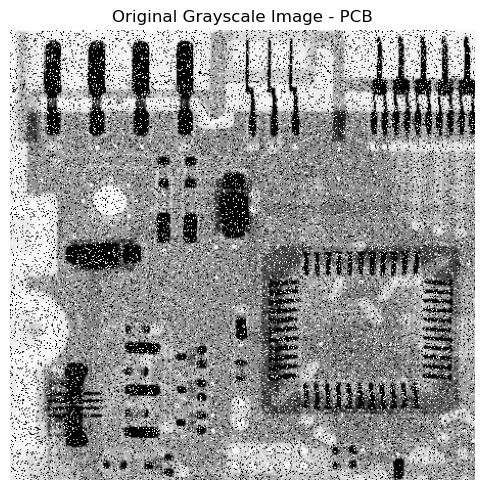

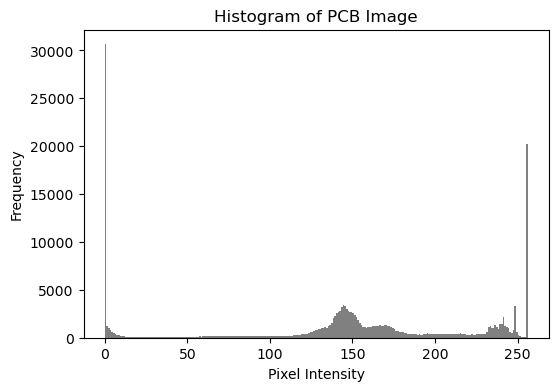

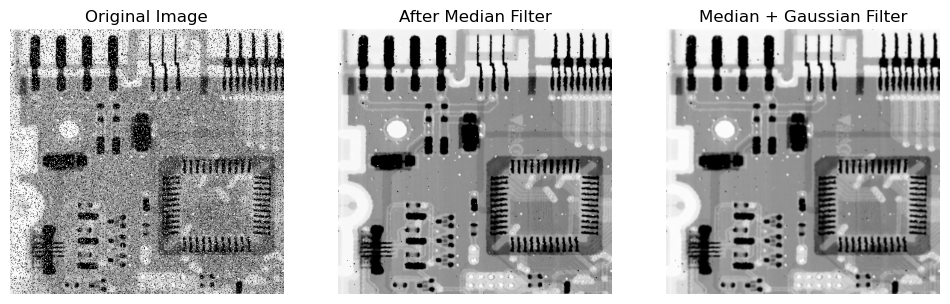

In [39]:
# Problem-5: Noise Removal on pcb.tiff

# Step 1: Let's start by reading the image in grayscale.
# This helps us focus on intensity and remove any color distractions.
pcb_path = 'data/pcb.tif'
pcb_img = cv2.imread(pcb_path, cv2.IMREAD_GRAYSCALE)
if pcb_img is None:
    raise FileNotFoundError(f"Could not load image at path: {pcb_path}")

# Show the image to understand what we’re working with
plt.figure(figsize=(6, 6))
plt.imshow(pcb_img, cmap='gray')
plt.title('Original Grayscale Image - PCB')
plt.axis('off')
plt.show()

# Step 2: Try to identify the type of noise in the image
# A histogram will help us see if there are extreme pixel values (0 and 255)
plt.figure(figsize=(6, 4))
plt.hist(pcb_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of PCB Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# From the visual inspection and histogram, the image seems to contain salt-and-pepper noise.
# This kind of noise looks like random white and black dots spread across the image.

# Step 3: We’ll apply a filter to reduce this noise.
# Median filter is great for salt-and-pepper because it replaces each pixel with the median of neighbors.
median_filtered = cv2.medianBlur(pcb_img, 3)  # Apply median filter with a small kernel

# The median filter removes most noise, but we can also apply a light Gaussian blur
# to smooth out any remaining graininess
smoothed_result = cv2.GaussianBlur(median_filtered, (3, 3), 0)

# Step 4: Display all results side by side for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(pcb_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('After Median Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(smoothed_result, cmap='gray')
plt.title('Median + Gaussian Filter')
plt.axis('off')

plt.show()

# Final thoughts:
# - The median filter did a good job of removing salt-and-pepper noise.
# - Adding Gaussian blur helps to slightly refine the result and make the texture smoother.
# - The combination is simple yet effective for this type of noise.

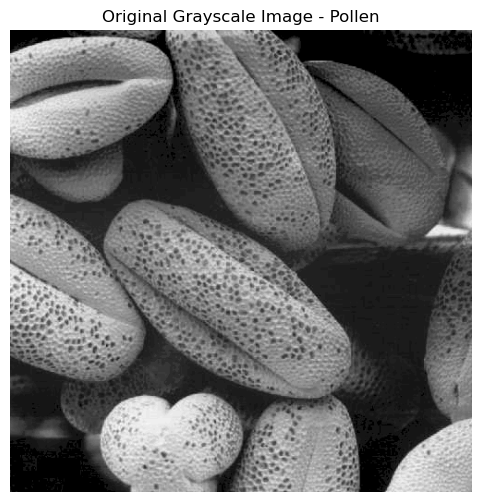

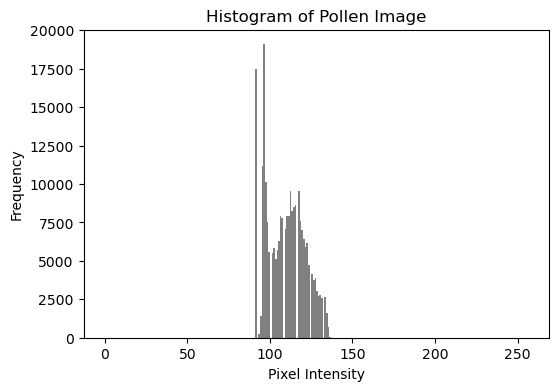

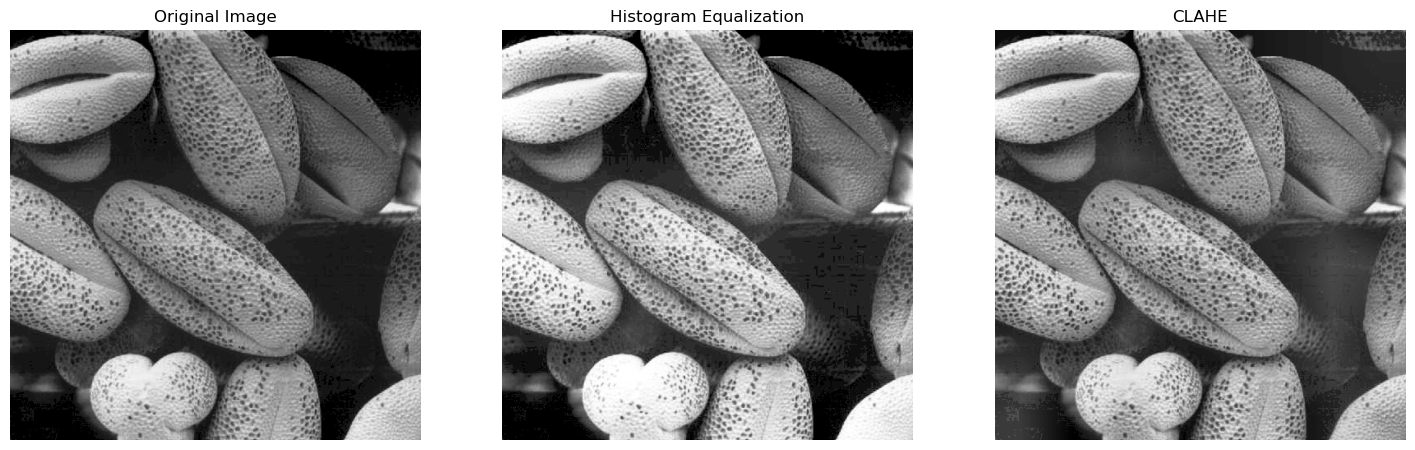

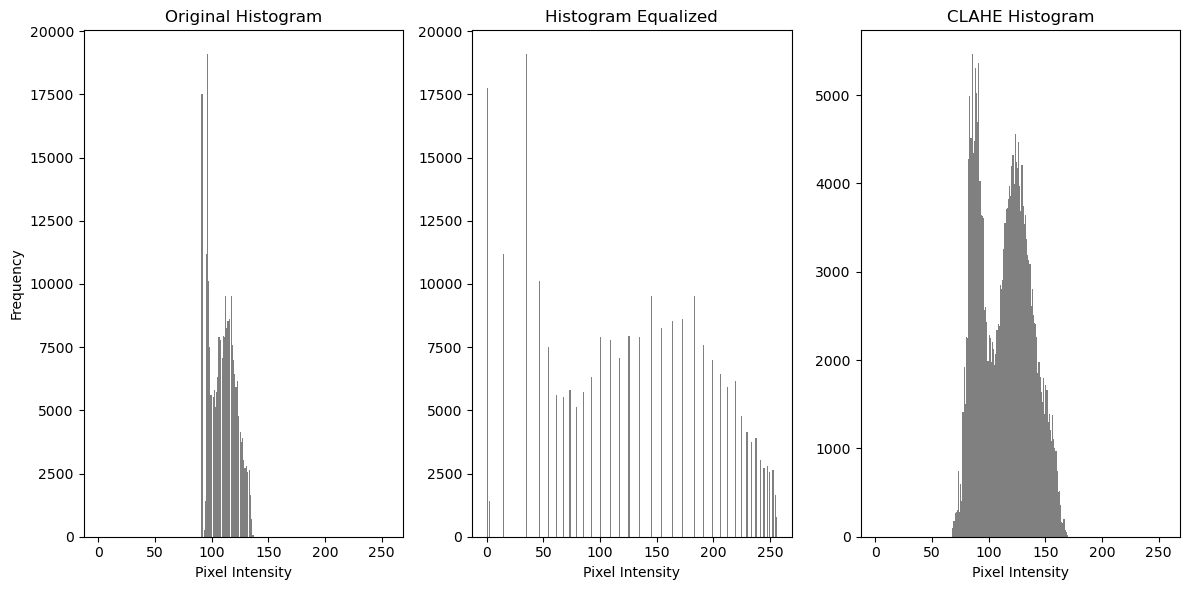

In [40]:
# Problem-6: Enhancement of pollen.tiff

# Step 1: Read the original image in grayscale
pollen_path = 'data/pollen.tif'
pollen_img = cv2.imread(pollen_path, cv2.IMREAD_GRAYSCALE)
if pollen_img is None:
    raise FileNotFoundError(f"Could not load image at path: {pollen_path}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(pollen_img, cmap='gray')
plt.title('Original Grayscale Image - Pollen')
plt.axis('off')
plt.show()

# Step 2: Analyze and comment on the problem using visual and statistical evidence
# Let's look at histogram to understand intensity distribution
plt.figure(figsize=(6, 4))
plt.hist(pollen_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of Pollen Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# From the histogram and visual inspection, the image appears to be low contrast.
# The pixel intensities are concentrated in a narrow range, making details hard to distinguish.

# Step 3: First Enhancement Approach - Histogram Equalization
hist_eq_img = cv2.equalizeHist(pollen_img)

# Step 4: Second Enhancement Approach - CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(pollen_img)

# Step 5: Display the results side by side
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(pollen_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hist_eq_img, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.show()

# Step 6: Provide justification with numerical and visual support
# We compare histograms of the original and processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(pollen_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(hist_eq_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram Equalized')
plt.xlabel('Pixel Intensity')

plt.subplot(1, 3, 3)
plt.hist(clahe_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('CLAHE Histogram')
plt.xlabel('Pixel Intensity')

plt.tight_layout()
plt.show()

# Final Comments:
# - Histogram Equalization stretches contrast but may over-enhance noise.
# - CLAHE enhances contrast more locally and avoids over-amplifying background noise.
# - Both techniques significantly improve visibility of structures in the pollen image.
# - CLAHE is especially useful in images with varying lighting or local contrast issues.
